In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

caged = pd.read_csv('https://raw.githubusercontent.com/ismaelnobrega/projeto/master/caged19.csv', encoding='iso-8859-1', header=0, names=['Estado', 'Município', 'Sexo', 'Faixa Etária','Saldo'])

print(caged.head())

  Estado   Município       Sexo Faixa Etária  Saldo
0     MA  Acailandia  Masculino       Até 17     17
1     MA  Acailandia  Masculino      18 a 24    267
2     MA  Acailandia  Masculino      25 a 29    -30
3     MA  Acailandia  Masculino      30 a 39   -261
4     MA  Acailandia  Masculino      40 a 49   -102


In [0]:
caged2 = caged

In [0]:
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("18 a 24", 1)
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("25 a 29", 2)
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("30 a 39", 3)
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("40 a 49", 4)
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("50 a 64", 5)
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("65 ou mais", 6)
caged2['Faixa Etária'] = caged['Faixa Etária'].replace("Até 17", 0)

In [0]:
caged2['Sexo'] = caged['Sexo'].replace("Masculino", 0)
caged2['Sexo'] = caged['Sexo'].replace("Feminino", 1)

In [18]:
caged2.head(20)

,Estado,Município,Sexo,Faixa Etária,Saldo
0,MA,Acailandia,0,0,17
1,MA,Acailandia,0,1,267
2,MA,Acailandia,0,2,-30
3,MA,Acailandia,0,3,-261
4,MA,Acailandia,0,4,-102
5,MA,Acailandia,0,5,-73
6,MA,Acailandia,0,6,-13
7,MA,Acailandia,0,Total,-195
8,MA,Acailandia,1,0,8
9,MA,Acailandia,1,1,65


In [19]:
caged2.head(30)

,Estado,Município,Sexo,Faixa Etária,Saldo
0,MA,Acailandia,0,0,17
1,MA,Acailandia,0,1,267
2,MA,Acailandia,0,2,-30
3,MA,Acailandia,0,3,-261
4,MA,Acailandia,0,4,-102
5,MA,Acailandia,0,5,-73
6,MA,Acailandia,0,6,-13
7,MA,Acailandia,0,Total,-195
8,MA,Acailandia,1,0,8
9,MA,Acailandia,1,1,65


In [0]:
caged3 = caged2.rename(columns={ "Faixa Etária" : "faixa_etaria"})

In [21]:
caged3.head()

,Estado,Município,Sexo,faixa_etaria,Saldo
0,MA,Acailandia,0,0,17
1,MA,Acailandia,0,1,267
2,MA,Acailandia,0,2,-30
3,MA,Acailandia,0,3,-261
4,MA,Acailandia,0,4,-102


In [0]:
caged3 = caged3[caged3.Estado != 'TOTAL']

In [0]:
caged3 = caged3[caged3.Sexo != 'Total']

In [0]:
caged3 = caged3[caged3.faixa_etaria != 'Total']

In [30]:
caged3.tail(100)

,Estado,Município,Sexo,faixa_etaria,Saldo
42349,BA,Varzedo,1,5,1
42350,BA,Varzedo,1,6,0
42360,BA,Vera Cruz,0,0,-3
42361,BA,Vera Cruz,0,1,10
42362,BA,Vera Cruz,0,2,-27
...,...,...,...,...,...
42514,BA,Xique,1,2,-7
42515,BA,Xique,1,3,2
42516,BA,Xique,1,4,0
42517,BA,Xique,1,5,-3


In [31]:
print(caged3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24808 entries, 0 to 42518
Data columns (total 5 columns):
Estado          24808 non-null object
Município       24808 non-null object
Sexo            24808 non-null object
faixa_etaria    24808 non-null object
Saldo           24808 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.1+ MB
None


In [0]:
def separate_by_genero(dataset):
  generos = np.unique(dataset['Sexo'])

  separated = []
  for cl in generos:
    separated.append(dataset[dataset['Sexo'] == cl])

  return separated

separated = separate_by_genero(caged3)

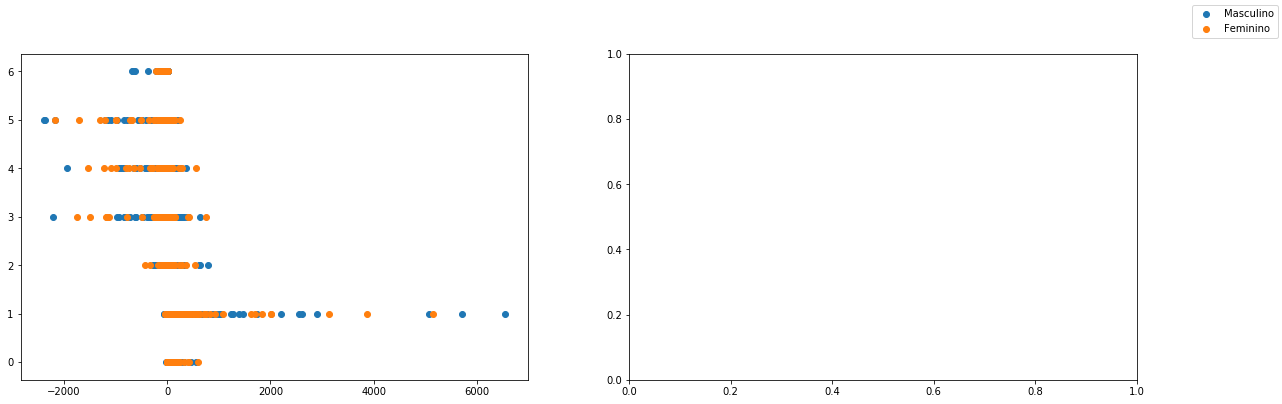

In [34]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,h=6)
for s in separated:
  ax[0].scatter(s['Saldo'], s['faixa_etaria'])
  
fig.legend(['Masculino', 'Feminino']) 

In [0]:
caged4 = caged3[['faixa_etaria', 'Saldo', 'Sexo']]

In [36]:
caged4.head(20)

,faixa_etaria,Saldo,Sexo
0,0,17,0
1,1,267,0
2,2,-30,0
3,3,-261,0
4,4,-102,0
5,5,-73,0
6,6,-13,0
8,0,8,1
9,1,65,1
10,2,11,1


In [37]:
def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in dataset.columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(caged4)

print(summaries)

[(3.0, 2.0, 24808), (2.3668574653337635, 115.1318681979252, 24808)]


In [0]:
def calculate_probability(x, mean, stdev):
	exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

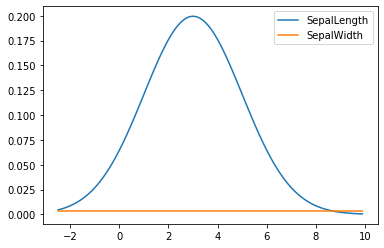

In [39]:
x = np.arange(-2.5,10,0.1)
for summ in summaries:
  y = calculate_probability(x, summ[0], summ[1])
  plt.plot(x,y)

plt.legend(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])